This dataset takes what we learned in Train Test Split, and applies it to Naieve Bayes Classification, a probabalistic classifier

In [1]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

This line loads in the dataset, and assigns it to two different variables

In [ ]:
help(GaussianNB())

In [2]:
iris_attributes, iris_classes = load_iris(return_X_y=True)

NameError: name 'iris0' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

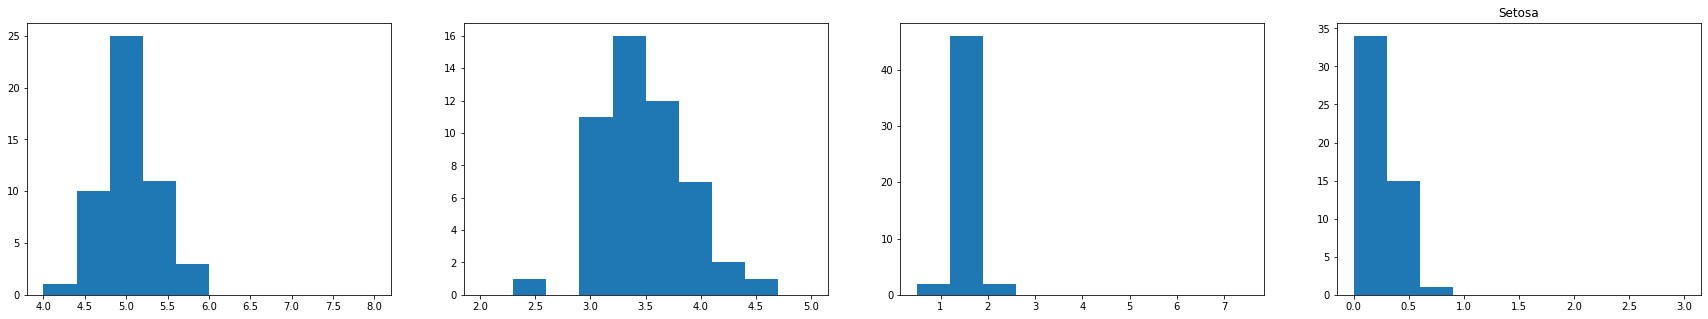

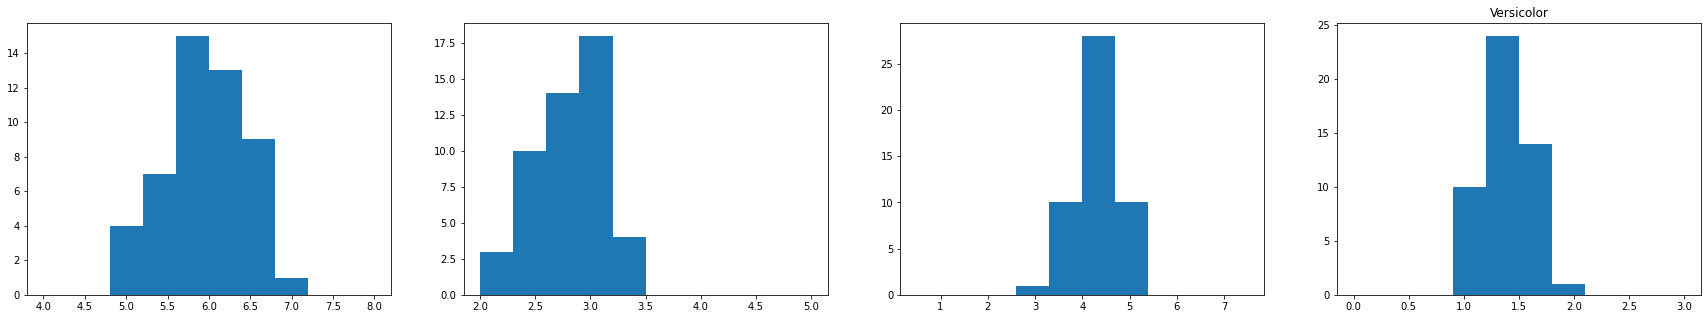

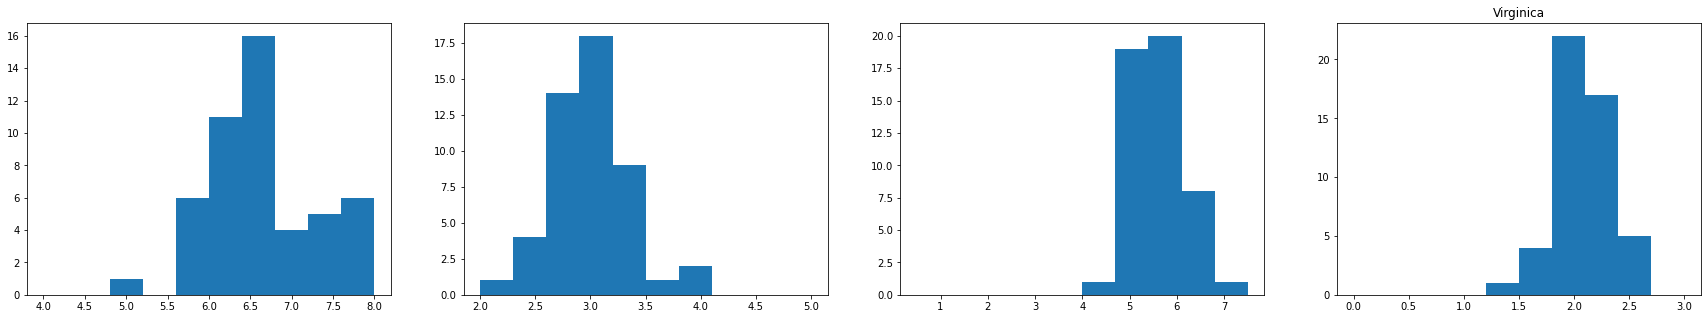

In [4]:
#this is to visualize the data, so we can see what we're working with
iris0 = (iris_attributes[0:50,0:4])
iris1 = (iris_attributes[51:100,0:4])
iris2 = (iris_attributes[101:150,0:4])

data_list = (iris0, iris1, iris2)
groups = ('Setosa','Versicolor','Virginica')

for data, group in zip(data_list, groups):
    fig = plt.figure(figsize=(30,5))
    ax1 = fig.add_subplot(1,4,1)
    ax1.hist(data[:,0], range=[4,8])
    ax2 = fig.add_subplot(1,4,2)
    ax2.hist(data[:,1], range=[2,5])
    ax3 = fig.add_subplot(1,4,3)
    ax3.hist(data[:,2], range=[0.5,7.5])
    ax4 = fig.add_subplot(1,4,4)
    ax4.hist(data[:,3], range=[0,3])
    plt.title(group)
plt.show

These lines load an untrained naive Bayes classification model, and stores the untrained model into a variable, before fitting it to our data using the equations provided in the powerpoint.

In [5]:
model = GaussianNB()
model.fit(iris_attributes,iris_classes)

GaussianNB()

We can then make predictions for irises between x and y, however, this isn't really a valid test because the algorithm has already "seen" the correct answers to all of the questions that we have to ask it.

Note, however that even though the model should "know better", observation 52 is still predicted to be the wrong species

In [6]:
print(model.predict(iris_attributes[50:55]))
print(iris_classes[50:55])

[1 1 2 1 1]
[1 1 1 1 1]


We should initialize a classifier and properly train it using a proper train test split algorithm.

Please note that you can artificially train a more accurate classifier by training repeatedly on different train-test splits, but doing so for real research tends to be frowned upon, as it is considered to be similar to p-hacking or overfitting the data.

In [7]:
model_split = GaussianNB()

In [8]:
attributes_train, attributes_test, classes_train, classes_test = train_test_split(iris_attributes, iris_classes, test_size=0.2, random_state=50)

In [9]:
print(attributes_train)

[[7.2 3.2 6.  1.8]
 [5.1 2.5 3.  1.1]
 [6.1 2.8 4.7 1.2]
 [6.7 3.3 5.7 2.5]
 [5.1 3.7 1.5 0.4]
 [4.6 3.1 1.5 0.2]
 [5.2 2.7 3.9 1.4]
 [6.  2.2 5.  1.5]
 [5.4 3.  4.5 1.5]
 [5.  3.4 1.5 0.2]
 [4.5 2.3 1.3 0.3]
 [4.9 2.4 3.3 1. ]
 [6.5 3.  5.8 2.2]
 [4.4 2.9 1.4 0.2]
 [7.1 3.  5.9 2.1]
 [5.1 3.5 1.4 0.3]
 [4.4 3.2 1.3 0.2]
 [5.7 3.8 1.7 0.3]
 [6.3 2.5 5.  1.9]
 [5.8 2.8 5.1 2.4]
 [6.6 3.  4.4 1.4]
 [5.4 3.9 1.7 0.4]
 [5.7 4.4 1.5 0.4]
 [6.1 2.9 4.7 1.4]
 [5.8 2.7 5.1 1.9]
 [5.7 2.8 4.1 1.3]
 [7.  3.2 4.7 1.4]
 [5.2 3.5 1.5 0.2]
 [4.4 3.  1.3 0.2]
 [7.7 2.8 6.7 2. ]
 [7.7 3.8 6.7 2.2]
 [6.4 2.9 4.3 1.3]
 [6.3 2.9 5.6 1.8]
 [5.  3.5 1.3 0.3]
 [4.9 3.6 1.4 0.1]
 [6.5 3.  5.5 1.8]
 [6.  2.9 4.5 1.5]
 [5.  3.6 1.4 0.2]
 [5.5 2.3 4.  1.3]
 [5.1 3.8 1.9 0.4]
 [7.3 2.9 6.3 1.8]
 [6.4 3.1 5.5 1.8]
 [6.7 3.1 4.4 1.4]
 [6.4 2.8 5.6 2.1]
 [5.6 2.5 3.9 1.1]
 [4.6 3.2 1.4 0.2]
 [6.3 2.3 4.4 1.3]
 [5.2 4.1 1.5 0.1]
 [5.5 2.5 4.  1.3]
 [6.9 3.1 4.9 1.5]
 [4.7 3.2 1.6 0.2]
 [4.9 3.1 1.5 0.1]
 [5.9 3.  4.

In [10]:
model_split.fit(attributes_train,classes_train)

GaussianNB()

Now we can have the model make predictions on data that it's never seen before and save them to a variable to check how it did!

In [11]:
predictions = model_split.predict(attributes_test)

Finally, we test our model, if predictions match the known categories, we should be able to rely on these predictions 

In [12]:
print(predictions)
print(classes_test)

[1 1 0 0 2 2 2 0 0 1 0 2 0 2 1 0 1 0 1 2 2 1 0 2 1 2 2 1 1 2]
[1 1 0 0 2 2 2 0 0 1 0 2 0 2 1 0 1 0 1 1 2 1 0 2 1 2 1 1 1 2]


Further validation, if it prints all 0's, the model is 100% accurate!

In [14]:
diffs = predictions - classes_test
print(diffs)
print(diffs.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0]
(30,)


In [15]:
28/30

0.9333333333333333

In [16]:
partial_training_set = attributes_train[:,0:1]
print(partial_training_set)

[[7.2]
 [5.1]
 [6.1]
 [6.7]
 [5.1]
 [4.6]
 [5.2]
 [6. ]
 [5.4]
 [5. ]
 [4.5]
 [4.9]
 [6.5]
 [4.4]
 [7.1]
 [5.1]
 [4.4]
 [5.7]
 [6.3]
 [5.8]
 [6.6]
 [5.4]
 [5.7]
 [6.1]
 [5.8]
 [5.7]
 [7. ]
 [5.2]
 [4.4]
 [7.7]
 [7.7]
 [6.4]
 [6.3]
 [5. ]
 [4.9]
 [6.5]
 [6. ]
 [5. ]
 [5.5]
 [5.1]
 [7.3]
 [6.4]
 [6.7]
 [6.4]
 [5.6]
 [4.6]
 [6.3]
 [5.2]
 [5.5]
 [6.9]
 [4.7]
 [4.9]
 [5.9]
 [4.9]
 [6. ]
 [4.8]
 [5.5]
 [6.1]
 [7.2]
 [7.7]
 [6.6]
 [6.3]
 [5.5]
 [5.8]
 [4.3]
 [6. ]
 [5.1]
 [6.3]
 [4.8]
 [5.2]
 [6. ]
 [5.9]
 [6.9]
 [6.7]
 [4.8]
 [6.2]
 [5.6]
 [6.7]
 [5. ]
 [5.1]
 [6.4]
 [6.5]
 [5.4]
 [6.2]
 [5.8]
 [5.7]
 [6.8]
 [5.6]
 [5.6]
 [5. ]
 [5. ]
 [6.4]
 [5. ]
 [7.6]
 [4.8]
 [5.7]
 [6.9]
 [5.1]
 [4.6]
 [5.6]
 [4.9]
 [6. ]
 [5. ]
 [5.4]
 [5. ]
 [6.1]
 [6.1]
 [5.8]
 [6.4]
 [6.1]
 [5.7]
 [4.7]
 [6.3]
 [4.6]
 [6.7]
 [5.9]
 [6.4]
 [5.5]
 [7.2]
 [6.9]]


In [17]:
partial_model = GaussianNB()

In [18]:
partial_model.fit(partial_training_set,classes_train)

GaussianNB()

In [19]:
predictions = partial_model.predict(attributes_test)
print(predictnions)
print(classes_test)
diffs = predictions - classes_test
print(diffs)
print("Errors: ", sum(diffs))

[1 1 2 2 1 1 1 1 2 1 2 2 2 1 1 2 1 2 1 1 1 1 2 2 1 2 1 1 1 1]
[1 1 0 0 2 2 2 0 0 1 0 2 0 2 1 0 1 0 1 1 2 1 0 2 1 2 1 1 1 2]
[ 0  0  2  2 -1 -1 -1  1  2  0  2  0  2 -1  0  2  0  2  0  0 -1  0  2  0
  0  0  0  0  0 -1]
Errors:  11
